# ANN Model creation and testing

## Contents

1. Training data generation
2. ANN model training and testing
3. Implementation of the model in GWSNR

In [8]:
# # If you have not installed the following packages, please uncomment and run the following command:
# !pip install ler

## 1. Training data generation

* The training data is generated using [ler](https://ler.readthedocs.io/en/latest/) package.
* Data needs to be trained for each detector separately.
* I will choose 'L1' detector for this notebook with the following specified parameters:
    * Sampling frequency : 2048 Hz
    * waveform approximant : IMRPhenomXPHM
    * minimum frequency : 20.0
    * psd : aLIGOaLIGODesignSensitivityT1800044 from `pycbc` package

In [ ]:
# # Intitialize the pycbc package first, to avoid error related to swiglal and multiprocessing
# import warnings
# warnings.filterwarnings("ignore", "Wswiglal-redir-stdio")
# import pycbc

PyCBC.libutils: pkg-config call failed, setting NO_PKGCONFIG=1


In [2]:
import numpy as np
import matplotlib.pyplot as plt
from ler.utils import TrainingDataGenerator

In [3]:
tdg = TrainingDataGenerator(
    npool=4,  # number of processes
    verbose=False, # set it to True if you are running the code for the first time
    # GWSNR parameters
    sampling_frequency=2048.,
    waveform_approximant='IMRPhenomXPHM',  # spin-precessing waveform model
    minimum_frequency=20.,
    psds={
        'L1': 'aLIGOaLIGODesignSensitivityT1800044',
    }, # chosen interferometer is 'L1'. If multiple interferometers are chosen, optimal network SNR will be considered.
)

* `ler` package, by default, generates astrophysical signals that most likely will not be detected by the detector, i.e. low SNR signals.

* But you want your ANN model to be sensitive to the signals that near the detection threshold.

* So, I will generate most of the training data with SNR near the detection threshold.

**Note:** Increase sample size of the training data to get better accuracy in the ANN model.

In [ ]:
# might take 13mins~15mins
tdg.gw_parameters_generator(
    size=20000,  # number of samples to generate
    batch_size=400000,  # reduce this number if you have memory issues
    snr_recalculation=True,  # pick SNR generated with 'interpolation'; recalculate SNR using 'inner product'
    trim_to_size=False, verbose=True,
    data_distribution_range = [0., 2., 4., 6., 8., 10., 12., 14., 16., 100.],  # equal data samples will be distributed in these ranges
    replace=False,  # set to True if you want to replace the existing data
    output_jsonfile="L1_IMRPhenomXPHM_1.json",
)

total event to collect: 20000



100%|████████████████████████████████████████████████████████████| 251/251 [00:00<00:00, 369.26it/s]


Collected number of events: 189


100%|████████████████████████████████████████████████████████████| 196/196 [00:00<00:00, 349.98it/s]


Collected number of events: 306


100%|████████████████████████████████████████████████████████████| 274/274 [00:00<00:00, 386.16it/s]


Collected number of events: 522


100%|████████████████████████████████████████████████████████████| 267/267 [00:00<00:00, 357.19it/s]


Collected number of events: 711


100%|████████████████████████████████████████████████████████████| 332/332 [00:00<00:00, 447.39it/s]


Collected number of events: 963


100%|████████████████████████████████████████████████████████████| 305/305 [00:00<00:00, 407.30it/s]


Collected number of events: 1197


100%|████████████████████████████████████████████████████████████| 302/302 [00:00<00:00, 435.01it/s]


Collected number of events: 1413


100%|████████████████████████████████████████████████████████████| 287/287 [00:00<00:00, 450.31it/s]


Collected number of events: 1638


100%|████████████████████████████████████████████████████████████| 205/205 [00:00<00:00, 407.79it/s]


Collected number of events: 1800


100%|████████████████████████████████████████████████████████████| 285/285 [00:00<00:00, 442.51it/s]


Collected number of events: 2016


100%|████████████████████████████████████████████████████████████| 205/205 [00:00<00:00, 372.86it/s]


Collected number of events: 2160


100%|████████████████████████████████████████████████████████████| 339/339 [00:00<00:00, 457.70it/s]


Collected number of events: 2403


100%|████████████████████████████████████████████████████████████| 187/187 [00:00<00:00, 384.26it/s]


Collected number of events: 2538


100%|████████████████████████████████████████████████████████████| 260/260 [00:00<00:00, 412.28it/s]


Collected number of events: 2754


100%|████████████████████████████████████████████████████████████| 234/234 [00:00<00:00, 412.41it/s]


Collected number of events: 2934


100%|████████████████████████████████████████████████████████████| 241/241 [00:00<00:00, 387.13it/s]


Collected number of events: 3105


100%|████████████████████████████████████████████████████████████| 268/268 [00:00<00:00, 442.05it/s]


Collected number of events: 3312


100%|████████████████████████████████████████████████████████████| 198/198 [00:00<00:00, 385.58it/s]


Collected number of events: 3438


100%|████████████████████████████████████████████████████████████| 215/215 [00:00<00:00, 400.22it/s]


Collected number of events: 3573


100%|████████████████████████████████████████████████████████████| 233/233 [00:00<00:00, 421.35it/s]


Collected number of events: 3726


100%|████████████████████████████████████████████████████████████| 224/224 [00:00<00:00, 414.34it/s]


Collected number of events: 3915


100%|████████████████████████████████████████████████████████████| 205/205 [00:00<00:00, 389.74it/s]


Collected number of events: 4077


100%|████████████████████████████████████████████████████████████| 215/215 [00:00<00:00, 370.22it/s]


Collected number of events: 4248


100%|████████████████████████████████████████████████████████████| 189/189 [00:00<00:00, 362.50it/s]


Collected number of events: 4383


100%|████████████████████████████████████████████████████████████| 251/251 [00:00<00:00, 418.58it/s]


Collected number of events: 4581


100%|████████████████████████████████████████████████████████████| 276/276 [00:00<00:00, 436.11it/s]


Collected number of events: 4815


100%|████████████████████████████████████████████████████████████| 276/276 [00:00<00:00, 426.94it/s]


Collected number of events: 5022


100%|████████████████████████████████████████████████████████████| 188/188 [00:00<00:00, 369.82it/s]


Collected number of events: 5157


100%|████████████████████████████████████████████████████████████| 252/252 [00:00<00:00, 400.04it/s]


Collected number of events: 5382


100%|████████████████████████████████████████████████████████████| 196/196 [00:00<00:00, 382.62it/s]


Collected number of events: 5535


100%|████████████████████████████████████████████████████████████| 179/179 [00:00<00:00, 364.76it/s]


Collected number of events: 5661


100%|████████████████████████████████████████████████████████████| 241/241 [00:00<00:00, 416.85it/s]


Collected number of events: 5868


100%|████████████████████████████████████████████████████████████| 313/313 [00:00<00:00, 448.66it/s]


Collected number of events: 6120


100%|████████████████████████████████████████████████████████████| 233/233 [00:00<00:00, 350.33it/s]


Collected number of events: 6282


100%|████████████████████████████████████████████████████████████| 260/260 [00:00<00:00, 415.12it/s]


Collected number of events: 6471


100%|████████████████████████████████████████████████████████████| 250/250 [00:00<00:00, 438.54it/s]


Collected number of events: 6669


100%|████████████████████████████████████████████████████████████| 321/321 [00:00<00:00, 412.48it/s]


Collected number of events: 6939


100%|████████████████████████████████████████████████████████████| 251/251 [00:00<00:00, 334.26it/s]


Collected number of events: 7110


100%|████████████████████████████████████████████████████████████| 189/189 [00:00<00:00, 351.38it/s]


Collected number of events: 7254


100%|████████████████████████████████████████████████████████████| 224/224 [00:00<00:00, 373.76it/s]


Collected number of events: 7434


100%|████████████████████████████████████████████████████████████| 319/319 [00:00<00:00, 433.78it/s]


Collected number of events: 7632


100%|████████████████████████████████████████████████████████████| 250/250 [00:00<00:00, 386.90it/s]


Collected number of events: 7812


100%|████████████████████████████████████████████████████████████| 270/270 [00:00<00:00, 407.29it/s]


Collected number of events: 8019


100%|████████████████████████████████████████████████████████████| 233/233 [00:00<00:00, 388.01it/s]


Collected number of events: 8208


100%|████████████████████████████████████████████████████████████| 241/241 [00:00<00:00, 385.32it/s]


Collected number of events: 8388


100%|████████████████████████████████████████████████████████████| 251/251 [00:00<00:00, 370.42it/s]


Collected number of events: 8532


100%|████████████████████████████████████████████████████████████| 267/267 [00:00<00:00, 409.25it/s]


Collected number of events: 8757


100%|████████████████████████████████████████████████████████████| 215/215 [00:00<00:00, 383.05it/s]


Collected number of events: 8901


100%|████████████████████████████████████████████████████████████| 170/170 [00:00<00:00, 286.00it/s]


Collected number of events: 9036


100%|████████████████████████████████████████████████████████████| 198/198 [00:00<00:00, 358.41it/s]


Collected number of events: 9153


100%|████████████████████████████████████████████████████████████| 279/279 [00:00<00:00, 420.71it/s]


Collected number of events: 9387


100%|████████████████████████████████████████████████████████████| 195/195 [00:00<00:00, 376.19it/s]


Collected number of events: 9531


100%|████████████████████████████████████████████████████████████| 314/314 [00:00<00:00, 434.33it/s]


Collected number of events: 9756


100%|████████████████████████████████████████████████████████████| 216/216 [00:00<00:00, 373.42it/s]


Collected number of events: 9900


100%|████████████████████████████████████████████████████████████| 367/367 [00:00<00:00, 442.46it/s]


Collected number of events: 10215


100%|████████████████████████████████████████████████████████████| 319/319 [00:00<00:00, 401.74it/s]


Collected number of events: 10476


100%|████████████████████████████████████████████████████████████| 269/269 [00:00<00:00, 405.15it/s]


Collected number of events: 10710


100%|████████████████████████████████████████████████████████████| 287/287 [00:00<00:00, 428.98it/s]


Collected number of events: 10908


100%|████████████████████████████████████████████████████████████| 266/266 [00:00<00:00, 413.26it/s]


Collected number of events: 11160


100%|████████████████████████████████████████████████████████████| 258/258 [00:00<00:00, 357.40it/s]


Collected number of events: 11385


100%|████████████████████████████████████████████████████████████| 313/313 [00:00<00:00, 423.88it/s]


Collected number of events: 11610


100%|████████████████████████████████████████████████████████████| 198/198 [00:00<00:00, 373.41it/s]


Collected number of events: 11754


100%|████████████████████████████████████████████████████████████| 250/250 [00:00<00:00, 394.34it/s]


Collected number of events: 11961


100%|████████████████████████████████████████████████████████████| 214/214 [00:00<00:00, 374.66it/s]


Collected number of events: 12132


100%|████████████████████████████████████████████████████████████| 294/294 [00:00<00:00, 437.88it/s]


Collected number of events: 12375


100%|████████████████████████████████████████████████████████████| 206/206 [00:00<00:00, 379.30it/s]


Collected number of events: 12546


100%|████████████████████████████████████████████████████████████| 178/178 [00:00<00:00, 370.11it/s]


Collected number of events: 12708


100%|████████████████████████████████████████████████████████████| 197/197 [00:00<00:00, 351.97it/s]


Collected number of events: 12834


100%|████████████████████████████████████████████████████████████| 268/268 [00:00<00:00, 421.06it/s]


Collected number of events: 13059


100%|████████████████████████████████████████████████████████████| 293/293 [00:00<00:00, 425.72it/s]


Collected number of events: 13311


100%|████████████████████████████████████████████████████████████| 153/153 [00:00<00:00, 323.14it/s]


Collected number of events: 13437


100%|████████████████████████████████████████████████████████████| 234/234 [00:00<00:00, 388.48it/s]


Collected number of events: 13626


100%|████████████████████████████████████████████████████████████| 250/250 [00:00<00:00, 353.34it/s]


Collected number of events: 13806


100%|████████████████████████████████████████████████████████████| 225/225 [00:00<00:00, 396.10it/s]


Collected number of events: 13986


100%|████████████████████████████████████████████████████████████| 261/261 [00:00<00:00, 379.11it/s]


Collected number of events: 14193


100%|████████████████████████████████████████████████████████████| 333/333 [00:00<00:00, 429.52it/s]


Collected number of events: 14499


100%|████████████████████████████████████████████████████████████| 215/215 [00:00<00:00, 401.40it/s]


Collected number of events: 14652


100%|████████████████████████████████████████████████████████████| 234/234 [00:00<00:00, 373.37it/s]


Collected number of events: 14841


100%|████████████████████████████████████████████████████████████| 224/224 [00:00<00:00, 390.64it/s]


Collected number of events: 15030


100%|████████████████████████████████████████████████████████████| 188/188 [00:00<00:00, 370.02it/s]


Collected number of events: 15192


100%|████████████████████████████████████████████████████████████| 231/231 [00:00<00:00, 355.76it/s]


Collected number of events: 15372


100%|████████████████████████████████████████████████████████████| 295/295 [00:00<00:00, 434.61it/s]


Collected number of events: 15597


100%|████████████████████████████████████████████████████████████| 206/206 [00:00<00:00, 370.83it/s]


Collected number of events: 15768


100%|████████████████████████████████████████████████████████████| 250/250 [00:00<00:00, 340.61it/s]


Collected number of events: 15957


100%|████████████████████████████████████████████████████████████| 225/225 [00:00<00:00, 411.89it/s]


Collected number of events: 16110


100%|████████████████████████████████████████████████████████████| 340/340 [00:00<00:00, 444.39it/s]


Collected number of events: 16335


100%|████████████████████████████████████████████████████████████| 320/320 [00:00<00:00, 451.66it/s]


Collected number of events: 16551


100%|████████████████████████████████████████████████████████████| 152/152 [00:00<00:00, 303.41it/s]


Collected number of events: 16632


100%|████████████████████████████████████████████████████████████| 205/205 [00:00<00:00, 336.09it/s]


Collected number of events: 16812


100%|████████████████████████████████████████████████████████████| 225/225 [00:00<00:00, 401.60it/s]


Collected number of events: 16992


100%|████████████████████████████████████████████████████████████| 170/170 [00:00<00:00, 361.45it/s]


Collected number of events: 17118


100%|████████████████████████████████████████████████████████████| 258/258 [00:00<00:00, 414.34it/s]


Collected number of events: 17298


100%|████████████████████████████████████████████████████████████| 213/213 [00:00<00:00, 381.80it/s]


Collected number of events: 17451


100%|████████████████████████████████████████████████████████████| 233/233 [00:00<00:00, 406.20it/s]


Collected number of events: 17649


100%|████████████████████████████████████████████████████████████| 215/215 [00:00<00:00, 385.26it/s]


Collected number of events: 17820


100%|████████████████████████████████████████████████████████████| 261/261 [00:00<00:00, 418.68it/s]


Collected number of events: 18036


100%|████████████████████████████████████████████████████████████| 171/171 [00:00<00:00, 358.60it/s]


Collected number of events: 18153


100%|████████████████████████████████████████████████████████████| 269/269 [00:00<00:00, 413.97it/s]


Collected number of events: 18378


100%|████████████████████████████████████████████████████████████| 261/261 [00:00<00:00, 423.24it/s]


Collected number of events: 18567


100%|████████████████████████████████████████████████████████████| 188/188 [00:00<00:00, 363.22it/s]


Collected number of events: 18693


100%|████████████████████████████████████████████████████████████| 189/189 [00:00<00:00, 373.93it/s]


Collected number of events: 18837


100%|████████████████████████████████████████████████████████████| 269/269 [00:00<00:00, 347.08it/s]


Collected number of events: 19035


100%|████████████████████████████████████████████████████████████| 234/234 [00:00<00:00, 402.57it/s]


Collected number of events: 19215


100%|████████████████████████████████████████████████████████████| 214/214 [00:00<00:00, 362.81it/s]


Collected number of events: 19395


100%|████████████████████████████████████████████████████████████| 310/310 [00:00<00:00, 434.61it/s]


Collected number of events: 19638


100%|████████████████████████████████████████████████████████████| 186/186 [00:00<00:00, 355.62it/s]


Collected number of events: 19791


100%|████████████████████████████████████████████████████████████| 296/296 [00:00<00:00, 420.12it/s]


Collected number of events: 20034
final size: 20034

json file saved at: ./ler_data/L1_IMRPhenomXPHM_1.json



In [5]:
# might take 2mins~3mins
tdg.gw_parameters_generator(
    size=5000, 
    batch_size=200000, 
    snr_recalculation=True,
    trim_to_size=False, verbose=True, 
    data_distribution_range = [6., 8., 10.], 
    replace=True,
    output_jsonfile="L1_IMRPhenomXPHM_2.json",
)

total event to collect: 5000



100%|████████████████████████████████████████████████████████████| 230/230 [00:00<00:00, 405.88it/s]


Collected number of events: 178


100%|████████████████████████████████████████████████████████████| 240/240 [00:00<00:00, 410.52it/s]


Collected number of events: 370


100%|████████████████████████████████████████████████████████████| 240/240 [00:00<00:00, 405.09it/s]


Collected number of events: 542


100%|████████████████████████████████████████████████████████████| 254/254 [00:00<00:00, 424.51it/s]


Collected number of events: 722


100%|████████████████████████████████████████████████████████████| 220/220 [00:00<00:00, 412.20it/s]


Collected number of events: 894


100%|████████████████████████████████████████████████████████████| 224/224 [00:00<00:00, 402.21it/s]


Collected number of events: 1068


100%|████████████████████████████████████████████████████████████| 254/254 [00:00<00:00, 386.37it/s]


Collected number of events: 1274


100%|████████████████████████████████████████████████████████████| 202/202 [00:00<00:00, 378.45it/s]


Collected number of events: 1436


100%|████████████████████████████████████████████████████████████| 212/212 [00:00<00:00, 384.79it/s]


Collected number of events: 1588


100%|████████████████████████████████████████████████████████████| 206/206 [00:00<00:00, 389.88it/s]


Collected number of events: 1740


100%|████████████████████████████████████████████████████████████| 202/202 [00:00<00:00, 395.82it/s]


Collected number of events: 1896


100%|████████████████████████████████████████████████████████████| 210/210 [00:00<00:00, 390.48it/s]


Collected number of events: 2064


100%|████████████████████████████████████████████████████████████| 202/202 [00:00<00:00, 390.15it/s]


Collected number of events: 2210


100%|████████████████████████████████████████████████████████████| 188/188 [00:00<00:00, 374.15it/s]


Collected number of events: 2350


100%|████████████████████████████████████████████████████████████| 208/208 [00:00<00:00, 380.95it/s]


Collected number of events: 2512


100%|████████████████████████████████████████████████████████████| 228/228 [00:00<00:00, 390.54it/s]


Collected number of events: 2694


100%|████████████████████████████████████████████████████████████| 188/188 [00:00<00:00, 369.88it/s]


Collected number of events: 2824


100%|████████████████████████████████████████████████████████████| 248/248 [00:00<00:00, 410.71it/s]


Collected number of events: 3004


100%|████████████████████████████████████████████████████████████| 244/244 [00:00<00:00, 415.04it/s]


Collected number of events: 3194


100%|████████████████████████████████████████████████████████████| 210/210 [00:00<00:00, 385.18it/s]


Collected number of events: 3356


100%|████████████████████████████████████████████████████████████| 232/232 [00:00<00:00, 406.46it/s]


Collected number of events: 3522


100%|████████████████████████████████████████████████████████████| 246/246 [00:00<00:00, 365.33it/s]


Collected number of events: 3712


100%|████████████████████████████████████████████████████████████| 236/236 [00:00<00:00, 408.95it/s]


Collected number of events: 3906


100%|████████████████████████████████████████████████████████████| 204/204 [00:00<00:00, 385.46it/s]


Collected number of events: 4064


100%|████████████████████████████████████████████████████████████| 206/206 [00:00<00:00, 401.87it/s]


Collected number of events: 4222


100%|████████████████████████████████████████████████████████████| 210/210 [00:00<00:00, 411.72it/s]


Collected number of events: 4392


100%|████████████████████████████████████████████████████████████| 226/226 [00:00<00:00, 404.36it/s]


Collected number of events: 4578


100%|████████████████████████████████████████████████████████████| 274/274 [00:00<00:00, 308.88it/s]


Collected number of events: 4816


100%|████████████████████████████████████████████████████████████| 230/230 [00:00<00:00, 407.55it/s]


Collected number of events: 5000
final size: 5000

json file saved at: ./ler_data/L1_IMRPhenomXPHM_2.json



In [6]:
tdg.gw_parameters_generator(
    size=2000, 
    batch_size=2000, 
    snr_recalculation=True,
    trim_to_size=False, 
    verbose=False, 
    data_distribution_range = None, 
    replace=True,
    output_jsonfile="L1_IMRPhenomXPHM_3.json",
)

total event to collect: 2000

final size: 2000

json file saved at: ./ler_data/L1_IMRPhenomXPHM_3.json



In [4]:
tdg.combine_dicts(
    file_name_list=["L1_IMRPhenomXPHM_1.json", "L1_IMRPhenomXPHM_2.json", "L1_IMRPhenomXPHM_3.json"],
    detector='L1',
    output_jsonfile="L1_IMRPhenomXPHM.json",
)

json file saved at: ./ler_data/L1_IMRPhenomXPHM.json



In [6]:
from gwsnr.utils import get_param_from_json
test1 = get_param_from_json("./ler_data/L1_IMRPhenomXPHM.json")

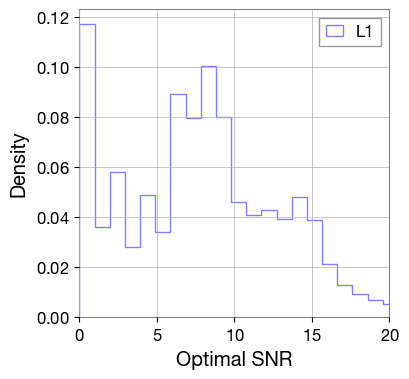

In [7]:
snr = np.array(test1['L1'])

plt.figure(figsize=[4,4])
plt.hist(snr, bins=100, density=True, alpha=0.5, color='b', histtype='step', label='L1')
plt.xlim([0, 20])
plt.xlabel('Optimal SNR')
plt.ylabel('Density')
plt.legend()
plt.show()

## 2. ANN model training and testing

In [1]:
import warnings
warnings.filterwarnings("ignore", "Wswiglal-redir-stdio")
import pycbc

import numpy as np
import matplotlib.pyplot as plt
from gwsnr import ANNModelGenerator

PyCBC.libutils: pkg-config call failed, setting NO_PKGCONFIG=1


In [2]:
amg = ANNModelGenerator(
    directory='./ler_data',
    npool=4,
    gwsnr_verbose=False,
    snr_th=8.0,
    waveform_approximant="IMRPhenomXPHM",
    psds={'L1': 'aLIGOaLIGODesignSensitivityT1800044'},
)

Trying to get the psd from pycbc:  aLIGOaLIGODesignSensitivityT1800044
Intel processor has trouble allocating memory when the data is huge. So, by default for IMRPhenomXPHM, duration_max = 64.0. Otherwise, set to some max value like duration_max = 600.0 (10 mins)
Interpolator will be loaded for L1 detector from ./interpolator_pickle/L1/partialSNR_dict_5.pickle


In [3]:
amg.ann_model_training(
    gw_param_dict='L1_IMRPhenomXPHM.json',
    randomize=True,
    test_size=0.1,
    random_state=42,
    num_nodes_list = [5, 32, 32, 1],
    activation_fn_list = ['relu', 'relu', 'sigmoid', 'linear'],
    optimizer='adam',
    loss='mean_squared_error',
    metrics=['accuracy'],
    batch_size=32,
    epochs=100,
    error_adjustment_snr_range=[4,10],
    ann_file_name = 'ann_model.h5',
    scaler_file_name = 'scaler.pkl',
    error_adjustment_file_name='error_adjustment.json',
    ann_path_dict_file_name='ann_path_dict.json',
)

# # Uncomment the following, if you have already trained the model
# # load the trained model
# amg.load_model_scaler_error(
#     ann_file_name='ann_model.h5', 
#     scaler_file_name='scaler.pkl',
#     error_adjustment_file_name='error_adjustment.json',
# )

Epoch 1/100
761/761 ━━━━━━━━━━━━━━━━━━━━ 1s 330us/step - accuracy: 0.0000e+00 - loss: 60.1962
Epoch 2/100
761/761 ━━━━━━━━━━━━━━━━━━━━ 0s 311us/step - accuracy: 0.0000e+00 - loss: 15.3533
Epoch 3/100
761/761 ━━━━━━━━━━━━━━━━━━━━ 0s 311us/step - accuracy: 2.1816e-06 - loss: 10.6985
Epoch 4/100
761/761 ━━━━━━━━━━━━━━━━━━━━ 0s 312us/step - accuracy: 1.2817e-04 - loss: 6.6071
Epoch 5/100
761/761 ━━━━━━━━━━━━━━━━━━━━ 0s 315us/step - accuracy: 2.0384e-04 - loss: 5.1524
Epoch 6/100
761/761 ━━━━━━━━━━━━━━━━━━━━ 0s 310us/step - accuracy: 6.9160e-04 - loss: 3.6330
Epoch 7/100
761/761 ━━━━━━━━━━━━━━━━━━━━ 0s 319us/step - accuracy: 8.3854e-04 - loss: 2.6244
Epoch 8/100
761/761 ━━━━━━━━━━━━━━━━━━━━ 0s 334us/step - accuracy: 8.9777e-04 - loss: 2.8004
Epoch 9/100
761/761 ━━━━━━━━━━━━━━━━━━━━ 0s 320us/step - accuracy: 6.4338e-04 - loss: 2.0306
Epoch 10/100
761/761 ━━━━━━━━━━━━━━━━━━━━ 0s 324us/step - accuracy: 0.0013 - loss: 1.6756
Epoch 11/100
761/761 ━━━━━━━━━━━━━━━━━━━━ 0s 311us/step - accuracy: 0.

In [4]:
amg.pdet_error()

85/85 ━━━━━━━━━━━━━━━━━━━━ 0s 311us/step
Error: 4.47%


(4.474852071005917,
 array([ 0.6503068,  2.8485513, 29.869919 , ...,  0.6989086,
         2.355064 ,  8.785247 ], dtype=float32),
 array([ 0.53725484,  2.89854586, 29.6622911 , ...,  0.48584523,
         2.28493042,  9.71307185]))

In [5]:
amg.pdet_confusion_matrix()

85/85 ━━━━━━━━━━━━━━━━━━━━ 0s 276us/step
[[1274   64]
 [  56 1310]]
Accuracy: 95.562%


(array([[1274,   64],
        [  56, 1310]]),
 95.56213017751479,
 array([False, False,  True, ..., False, False,  True]),
 array([False, False,  True, ..., False, False,  True]))

611/845 ━━━━━━━━━━━━━━━━━━━━ 0s 247us/step

/Users/phurailatpamhemantakumar/.local/lib/python3.10/site-packages/keras/src/trainers/data_adapters/array_slicing.py:62: RuntimeWarning: overflow encountered in cast
  return x.astype(dtype)


845/845 ━━━━━━━━━━━━━━━━━━━━ 0s 242us/step


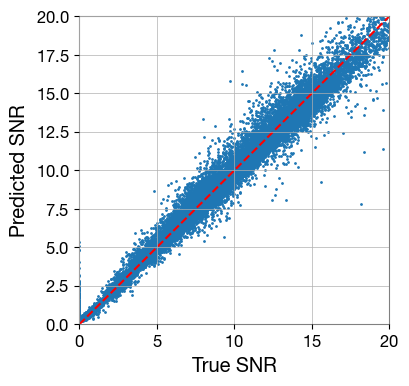

In [6]:
# predicted snr
pred_snr= amg.predict_snr(gw_param_dict='L1_IMRPhenomXPHM.json')
# true snr
true_snr = amg.get_parameters(gw_param_dict='L1_IMRPhenomXPHM.json')['L1']

# plot the predicted snr vs true snr
plt.figure(figsize=[4,4])
plt.scatter(true_snr, pred_snr, s=1)
snr_lim = [np.min([true_snr, true_snr]), np.max([true_snr, true_snr])]
plt.plot(snr_lim, snr_lim, 'r--')
plt.xlabel('True SNR')
plt.ylabel('Predicted SNR')
plt.xlim([0, 20])
plt.ylim([0, 20])
plt.show()

In [7]:
# use the following function to predict the pdet
pred_pdet = amg.predict_pdet(gw_param_dict='L1_IMRPhenomXPHM.json', snr_threshold=8.0)

# true pdet
true_pdet = np.array([1 if snr >= 8.0 else 0 for snr in true_snr])

from sklearn.metrics import confusion_matrix, accuracy_score
cm = confusion_matrix(true_pdet, pred_pdet)
print(cm)

acc = accuracy_score(true_pdet, pred_pdet)
print(acc)


845/845 ━━━━━━━━━━━━━━━━━━━━ 0s 227us/step
[[12773   630]
 [  610 13021]]
0.9541318339868314


## 3. Implementation of the ANN model in GWSNR

Generate new astrophysical data and test the model on it using GWSNR class.

In [1]:
import warnings
warnings.filterwarnings("ignore", "Wswiglal-redir-stdio")
import pycbc

import numpy as np
import matplotlib.pyplot as plt
from gwsnr import GWSNR
from ler.utils import TrainingDataGenerator

PyCBC.libutils: pkg-config call failed, setting NO_PKGCONFIG=1


Setting multiprocessing start method to 'fork'


In [2]:
# generate some new data
tdg = TrainingDataGenerator(
    npool=4,
    verbose=False, 
    ifos=['L1'],
    # GWSNR parameters
    sampling_frequency=2048,
    waveform_approximant='IMRPhenomXPHM',
    minimum_frequency=20,
    psds={
        'L1': 'aLIGOaLIGODesignSensitivityT1800044',
    },
)

tdg.gw_parameters_generator(
    size=20000, 
    batch_size=20000, 
    snr_recalculation=True,
    trim_to_size=False, 
    verbose=False, 
    data_distribution_range = None, 
    replace=True,
    output_jsonfile="L1_IMRPhenomXPHM_4.json",
)

total event to collect: 20000

final size: 20000

json file saved at: ./ler_data/L1_IMRPhenomXPHM_4.json



* using GWSNR class, with the trained ANN model, you can generate SNR of the astrophysical GW signal parameters

In [3]:
gwsnr = GWSNR(
    snr_type='ann',
    waveform_approximant="IMRPhenomXPHM",
    psds={'L1': 'aLIGOaLIGODesignSensitivityT1800044'},
    ann_path_dict='./ler_data/ann_path_dict.json',
)

Trying to get the psd from pycbc:  aLIGOaLIGODesignSensitivityT1800044
Intel processor has trouble allocating memory when the data is huge. So, by default for IMRPhenomXPHM, duration_max = 64.0. Otherwise, set to some max value like duration_max = 600.0 (10 mins)
ANN model for L1 is loaded from ./ler_data/ann_model.h5.
ANN scaler for L1 is loaded from ./ler_data/scaler.pkl.
ANN error_adjustment for L1 is loaded from ./ler_data/error_adjustment.json.
Interpolator will be loaded for L1 detector from ./interpolator_pickle/L1/partialSNR_dict_5.pickle

Chosen GWSNR initialization parameters:

npool:  4
snr type:  ann
waveform approximant:  IMRPhenomXPHM
sampling frequency:  2048.0
minimum frequency (fmin):  20.0
mtot=mass1+mass2
min(mtot):  2.0
max(mtot) (with the given fmin=20.0): 184.98599853446768
detectors:  ['L1']
psds:  [PowerSpectralDensity(frequency_array=[0.0000000e+00 6.2500000e-02 1.2500000e-01 ... 2.0478125e+03
 2.0478750e+03 2.0479375e+03], psd_array=[0.00000000e+00 0.00000000e

In [ ]:
# predicted snr, using ANN model 
pred_snr = gwsnr.snr(gw_param_dict='./ler_data/L1_IMRPhenomXPHM_4.json')['L1']

In [5]:
# true snr, using inner product
true_snr = gwsnr.compute_bilby_snr(gw_param_dict='./ler_data/L1_IMRPhenomXPHM_4.json')['L1']

100%|████████████████████████████████████████████████████████| 18890/18890 [00:31<00:00, 602.56it/s]


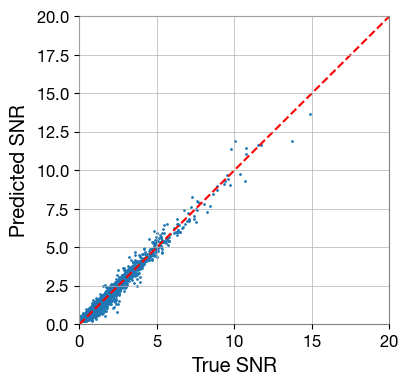

In [6]:
# plot the predicted snr vs true snr
plt.figure(figsize=[4,4])
plt.scatter(true_snr, pred_snr, s=1)
snr_lim = [np.min([true_snr, true_snr]), np.max([true_snr, true_snr])]
plt.plot(snr_lim, snr_lim, 'r--')
plt.xlabel('True SNR')
plt.ylabel('Predicted SNR')
plt.xlim([0, 20])
plt.ylim([0, 20])
plt.show()